# Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

# Loading the dataset from Local directory

In [2]:
data=pd.read_csv('D:\\AI STUDY MATERIAL\\ML\\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data=data.drop('id',1)

In [4]:
#displaying firts 5 rows
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data['date']=pd.to_datetime(data['date'])
data['Month']=data['date'].dt.month
data['Year']=data['date'].dt.year
data=data.drop(['lat','long'],axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503,2,2015


In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

Here only sqft_above have two missing values, so I will find the percentage of missing values and proceed accordingly.

In [7]:
(data['sqft_above'].isnull().sum()/data.shape[0])*100

0.009253689908851155

In [8]:
data=data.fillna(data['sqft_above'].mean())

Here, since percentage of missing value is very low, I will fill the missing values with their mean.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  float64       
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [10]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Month,Year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,6.574423,2014.322954
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631,3.115308,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,12.000000,2015.000000


In [11]:
data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


* From the above table, I can see that the maximum price of a house is 7700000.
* Average bedroom count is 3 whereas for bathroom it is 2.
* The average sqft_living area is 20780 while maximum is 13540, and for sqft_lot the average is 15106 and max is 1651359.
* Average houses have total of two floors while max no of floor goes to 3.

Also from the above table, I noticed that the maximum number of bedroom is 33 while bathroom is 8. Which is suprising and somewhat incorrect. So I will check for any outliers for that two features.

In [12]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
np.where(data['bedrooms']==33),np.where(data['bedrooms']==11)

((array([15870], dtype=int64),), (array([8757], dtype=int64),))

In [14]:
data=data.drop(data.index[15868])
data=data.drop(data.index[8755])
data.shape

(21611, 20)

In [15]:
data['bathrooms'].value_counts()

2.50    5380
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     730
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [16]:
values=[8.00,6.25,6.50,6.75,7.50,7.75]
for i in values:
    data['bathrooms']=data['bathrooms'].replace(i,3)

In [17]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'Month', 'Year'],
      dtype='object')

In [18]:
#for discrete plot

In [19]:
dscr_columns=[u'bedrooms',u'bathrooms',u'floors',u'waterfront',u'view',u'condition',u'grade',u'Month',u'Year']

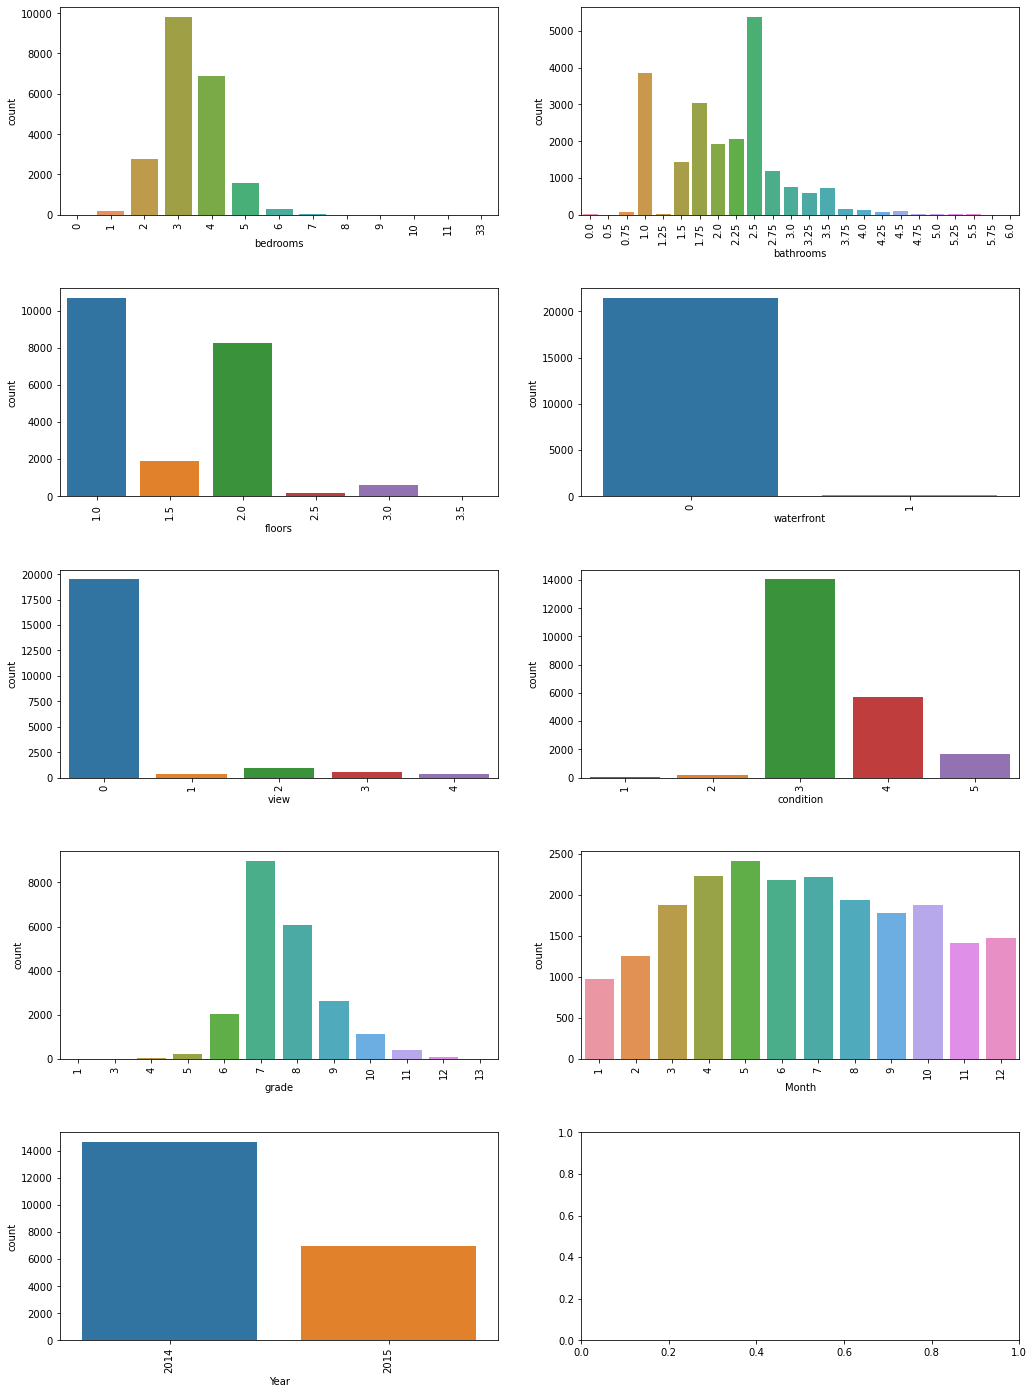

In [20]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)

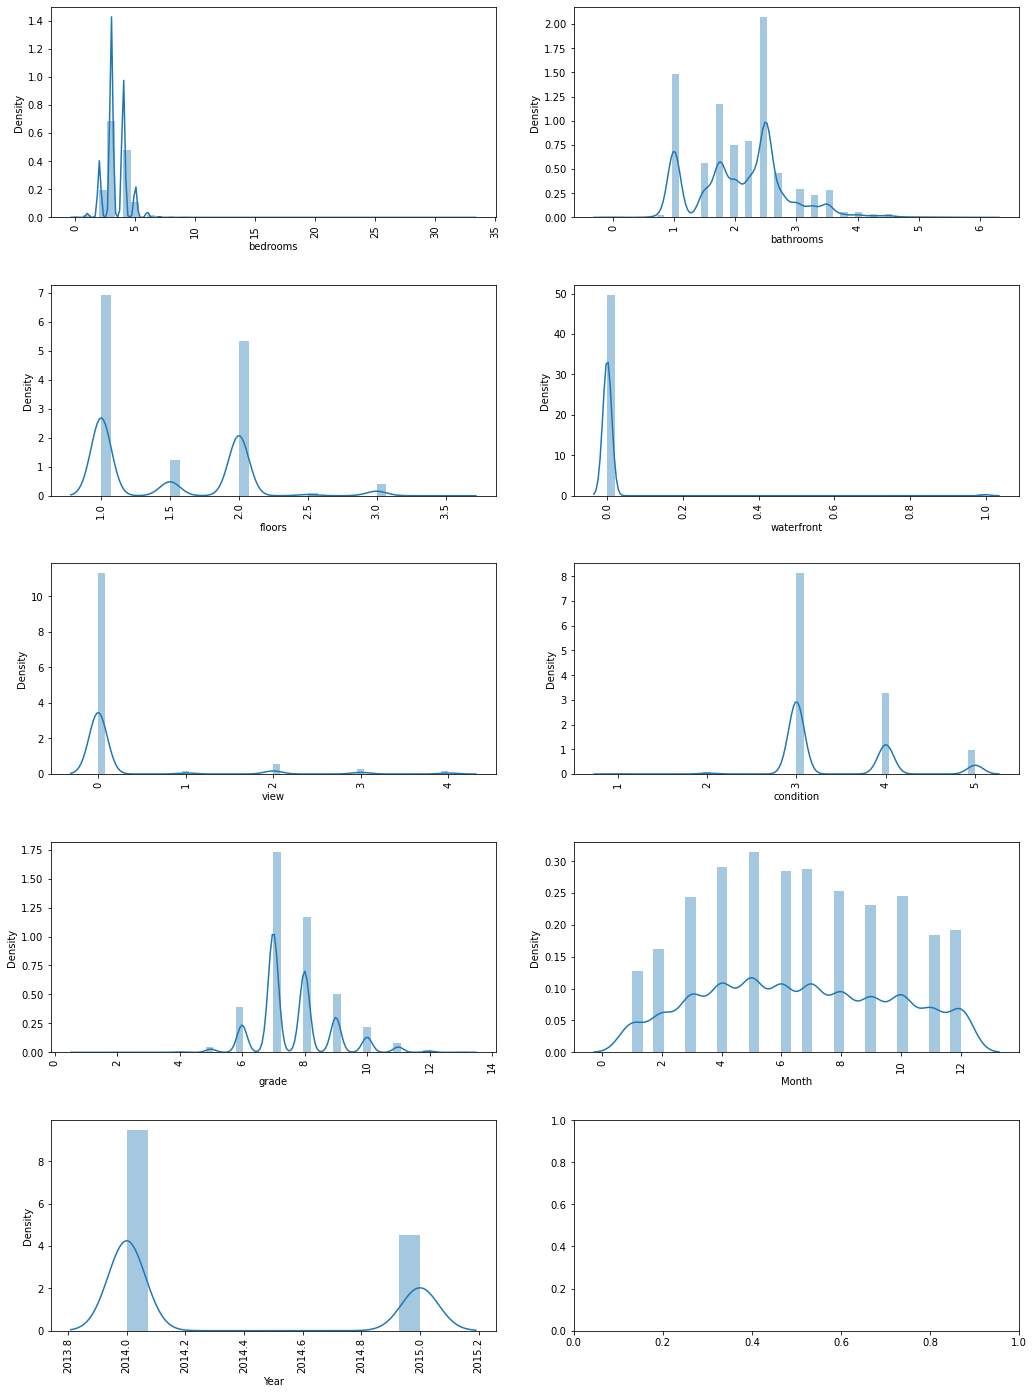

In [21]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sns.distplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)

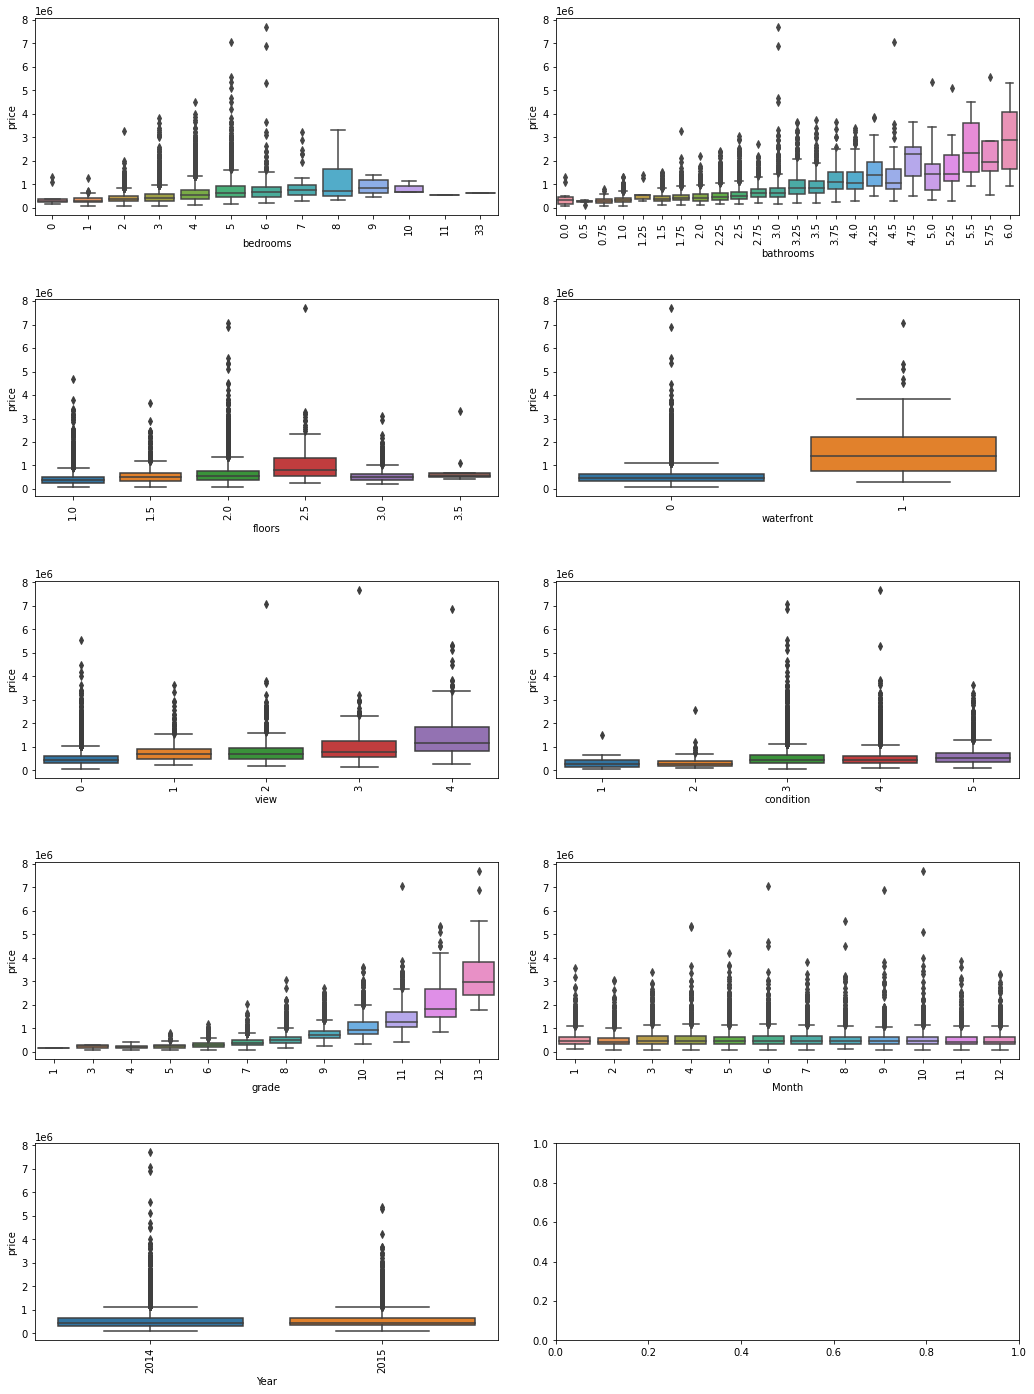

In [22]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(dscr_columns, ax.flatten()):
    sns.boxplot(x=variable,y='price', data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)
        

In [23]:
#for continuous_plot

In [24]:
cont_col=[u'sqft_living',u'sqft_lot',u'sqft_above',u'sqft_basement',u'yr_built',u'yr_renovated', u'zipcode',u'sqft_living15',u'sqft_lot15']

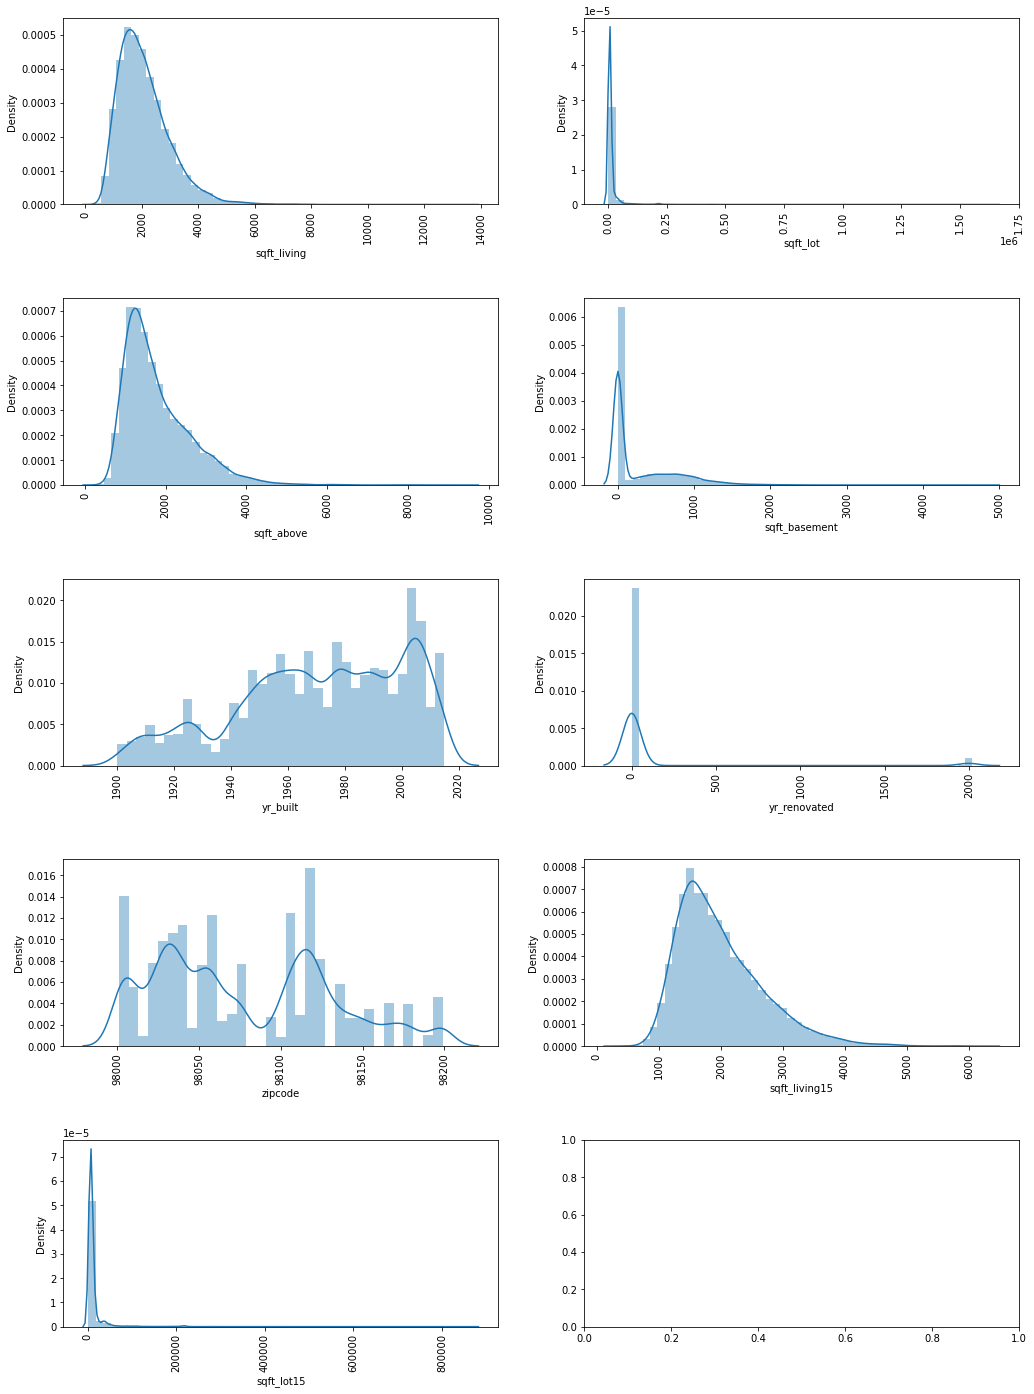

In [25]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(cont_col, ax.flatten()):
    sns.distplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)

In [26]:
for i in cont_col:
    x=data[i].skew()
    print("Skewness of ",i," is: ",x)

Skewness of  sqft_living  is:  1.4718681111350989
Skewness of  sqft_lot  is:  13.059482220855541
Skewness of  sqft_above  is:  1.4467055462988179
Skewness of  sqft_basement  is:  1.5779333103246833
Skewness of  yr_built  is:  -0.4698511519640082
Skewness of  yr_renovated  is:  4.549253295549605
Skewness of  zipcode  is:  0.405512966554637
Skewness of  sqft_living15  is:  1.1082903786116933
Skewness of  sqft_lot15  is:  9.506335141719433


Here skewness value of  sqft_living, sqft_lot, sqft_above, sqft_basement, yr_renovated, sqft_living15 and sqft_lot15 are very high so skewness should be removed for building a better model.

In [27]:
data['sqft_living']=np.log(data['sqft_living'])
data['sqft_lot']=np.log(np.log(data['sqft_lot']))
data['sqft_above']=np.log(data['sqft_above'])
data['sqft_basement']=np.sqrt(np.sqrt(data['sqft_basement']))**0.3
data['sqft_living15']=np.log(data['sqft_living15'])
data['sqft_lot15']=np.log(np.log(data['sqft_lot15']))

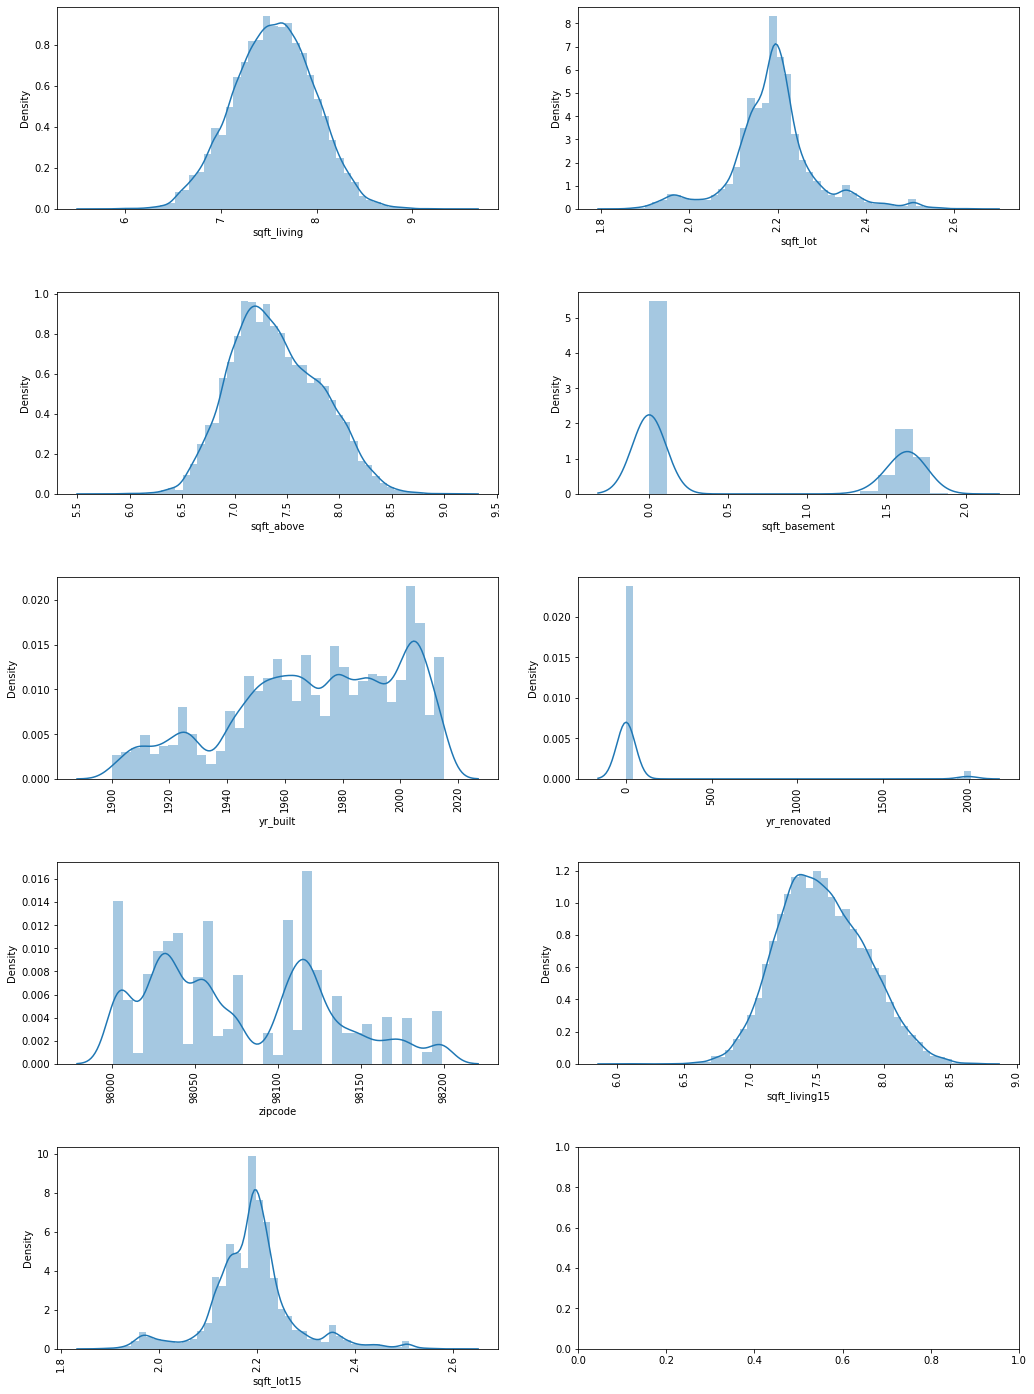

In [28]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(cont_col, ax.flatten()):
    sns.distplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)

Hence after transforming the skewed variables, you can see from the graph above that skewness of all the variables is close to normal distribution.

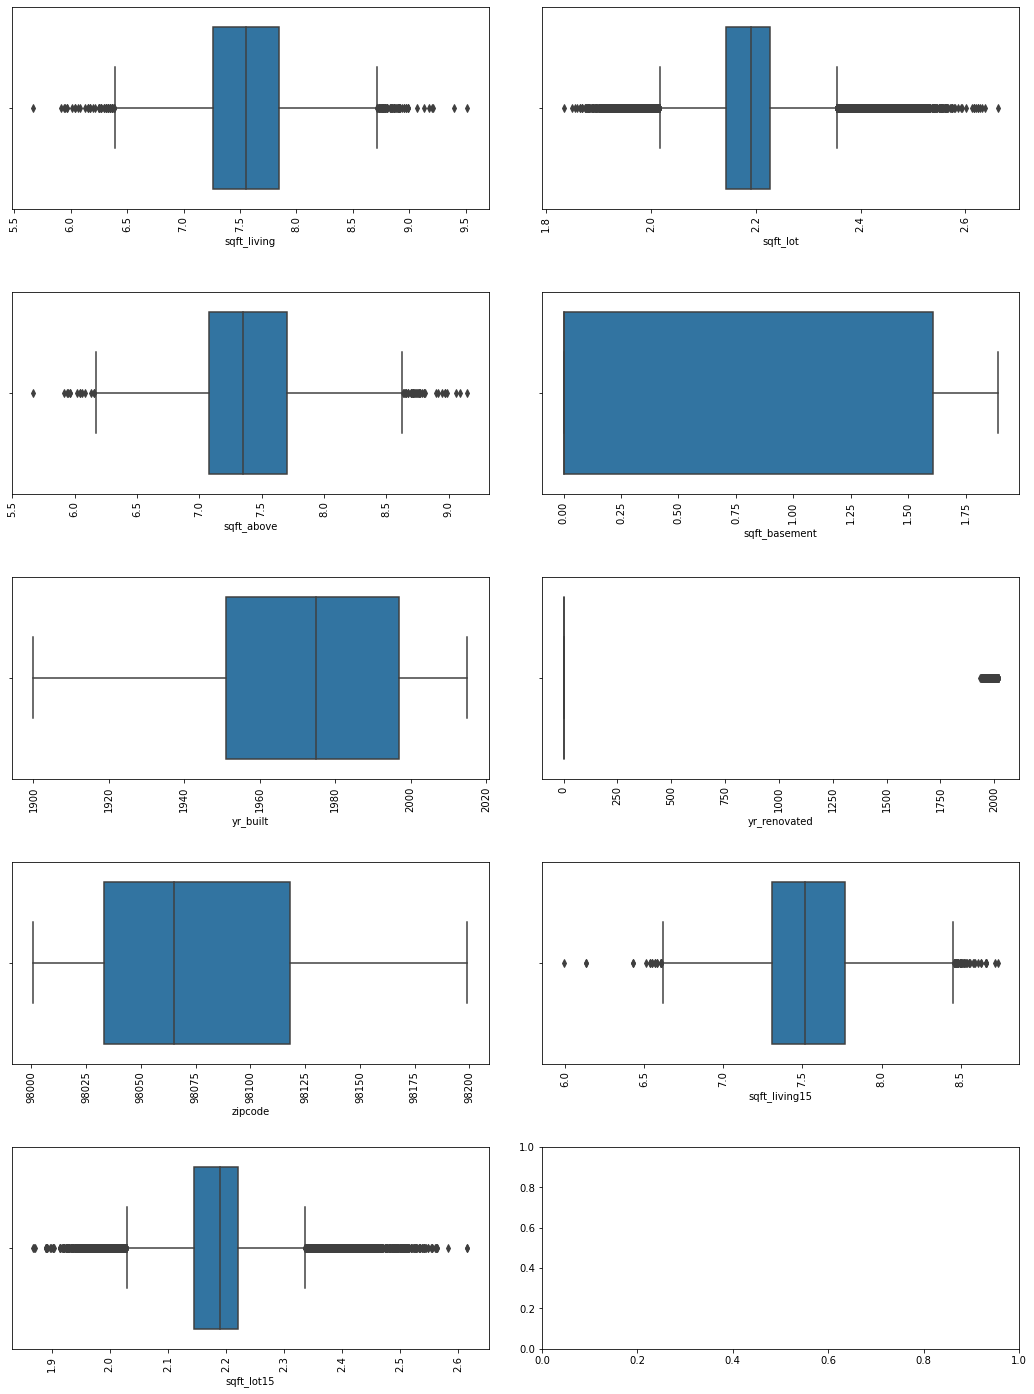

In [29]:
fig, ax= plt.subplots(5,2,figsize=(15,20))
for variable, subplot in zip(cont_col, ax.flatten()):
    sns.boxplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        fig.tight_layout(pad=3.0)

Also from boxplot we can verify that outliers are minimized which will help me in creating a better model.

Now I will finally check the skewness of the output variable(i.e the "price" variable)

<AxesSubplot:xlabel='price', ylabel='Density'>

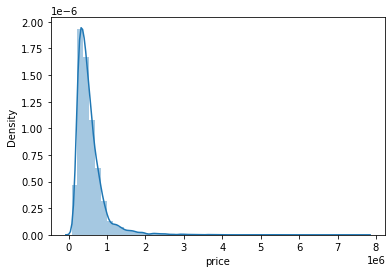

In [30]:
sns.distplot(data['price'])

<AxesSubplot:xlabel='price'>

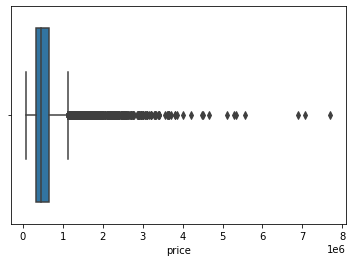

In [31]:
sns.boxplot(data['price'])

As you can see skewness is very high so I will apply the log transformation on my output variable to.

<AxesSubplot:xlabel='price', ylabel='Density'>

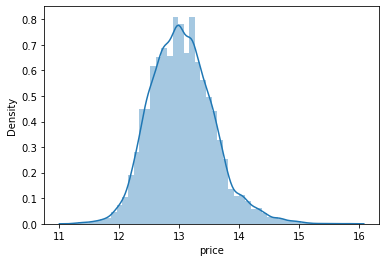

In [32]:
sns.distplot(np.log(data['price']))

<AxesSubplot:xlabel='price'>

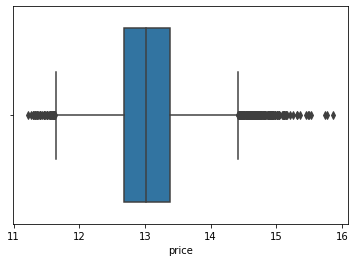

In [33]:
sns.boxplot(np.log(data['price']))

# Building the model

First, I will use the Ordinary Least Square method  to estimate the multi-variate regression model and then providing a variety of fit statistics.

In [34]:
import statsmodels.api as sm

In [35]:
X=data.drop(['date','price'],1)
y=data['price']

In [36]:
y=np.log(y)
y.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [37]:
x=sm.add_constant(X)

In [38]:
model1=sm.OLS(y,x)
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2395.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:50   Log-Likelihood:                -4949.7
No. Observations:               21611   AIC:                             9937.
Df Residuals:                   21592   BIC:                         1.009e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -96.9601     15.104     -6.420      0.000    -126.565     -67.355
bedrooms         -0.0298      0.003    -10.044      0.000      -0.036      -0.024
bathrooms         0.0666      0.005     13.477      0.000       0.057       0.076
sqft_living       0.1801      0.023      7.747      0.000       0.135       0.226
sqft_lot         -0.1458      0.057     -2.556      0.011      -0.258      -0.034
floors            0.0586      0.006      9.614      0.000       0.047       0.071
waterfront        0.3984      0.026     15.158      0.000       0.347       0.450
view              0.0424      0.003     13.331      0.000       0.036       0.049
condition         0.0481      0.004     13.469      0.000       0.041       0.055
grade             0.2069      0.003     67.049      0.000       0.201       0.213
sqft_above        0.1295      0.023      5.650      0.000       0.085       0.174
sqft_basement     0.0615      0.006     10.132      0.000       0.050       0.073
yr_built         -0.0054      0.000    -51.476      0.000      -0.006      -0.005
yr_renovated   1.958e-05   5.53e-06      3.539      0.000    8.73e-06    3.04e-05
zipcode           0.0002   4.51e-05      4.487      0.000       0.000       0.000
sqft_living15     0.2853      0.011     26.807      0.000       0.264       0.306
sqft_lot15       -0.4310      0.061     -7.038      0.000      -0.551      -0.311
Month             0.0012      0.001      1.081      0.280      -0.001       0.003
Year              0.0475      0.007      6.661      0.000       0.034       0.061
==============================================================================
Omnibus:                       65.116   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.013
Skew:                          -0.045   Prob(JB):                     1.55e-18
Kurtosis:                       3.288   Cond. No.                     7.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

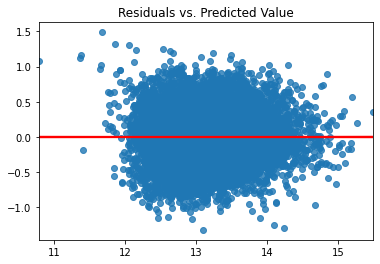

In [39]:
fitted_vals=model1.predict()
resids=model1.resid

sns.regplot(fitted_vals,resids,line_kws={'color':'red'})
plt.title('Residuals vs. Predicted Value')

Since the red line is almost horizontal, we can say that there is a linear relationship between explanatory variables and output variable.

<AxesSubplot:ylabel='Density'>

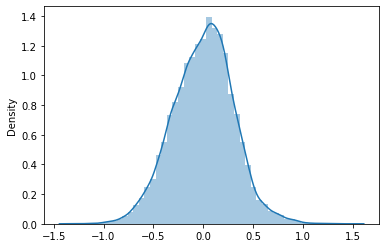

In [40]:
sns.distplot(model1.resid)

In [41]:
from scipy import stats

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.31918477, -1.28671205, -1.25525611, ...,  1.31070916,
          1.31941128,  1.4883344 ])),
 (0.30399464575116203, 3.081469808635043e-12, 0.9989793328597382))

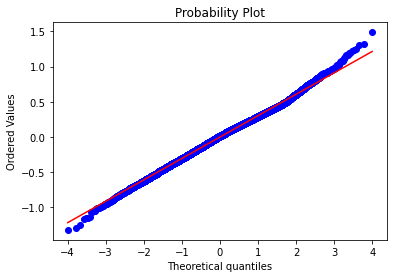

In [42]:
stats.probplot(resids, plot=sns.mpl.pyplot)

In [43]:
resids_standardized = model1.get_influence().resid_studentized_internal

<AxesSubplot:>

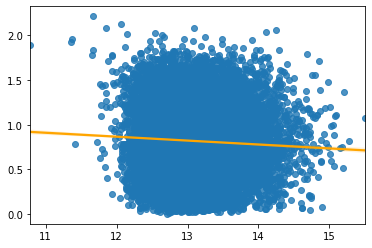

In [44]:
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif1= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame(vif1[1:],index=x.columns[1:])

,0
bedrooms,1.775352
bathrooms,3.312375
sqft_living,22.740242
sqft_lot,7.272907
floors,2.524615
waterfront,1.206167
view,1.385506
condition,1.261811
grade,3.067640
sqft_above,22.421684


the variables having inf vif factor should be treated(i.e removed) since they are showing very much high collinearity

In [47]:
x1=x.drop(['sqft_living','sqft_above'],1)
x1

,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Month,Year
0,1.0,3,1.00,2.156334,1.0,0,0,3,7,0.000000,1955,0,98178,7.200425,2.156334,10,2014
1,1.0,3,2.25,2.184663,2.0,0,0,3,7,1.567309,1951,1991,98125,7.432484,2.190650,12,2014
2,1.0,2,1.00,2.220327,1.0,0,0,3,6,0.000000,1933,0,98028,7.908387,2.196660,2,2015
3,1.0,4,3.00,2.142087,1.0,0,0,5,7,1.666971,1965,0,98136,7.215240,2.142087,12,2014
4,1.0,3,2.00,2.196908,1.0,0,0,3,8,0.000000,1987,0,98074,7.495542,2.188639,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,3,2.50,1.950309,3.0,0,0,3,8,0.000000,2009,0,98103,7.333023,1.990501,5,2014
21609,1.0,4,2.50,2.159621,2.0,0,0,3,8,0.000000,2014,0,98146,7.512071,2.184008,2,2015
21610,1.0,2,0.75,1.975172,2.0,0,0,3,7,0.000000,2009,0,98144,6.927558,2.028727,6,2014
21611,1.0,3,2.50,2.051326,2.0,0,0,3,8,0.000000,2004,0,98027,7.251345,1.968520,1,2015


In [48]:
model2=sm.OLS(y,x1)
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2578.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:32:57   Log-Likelihood:                -5266.0
No. Observations:               21611   AIC:                         1.057e+04
Df Residuals:                   21594   BIC:                         1.070e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -99.6724     15.325     -6.504      0.000    -129.711     -69.634
bedrooms         -0.0003      0.003     -0.117      0.907      -0.006       0.005
bathrooms         0.1068      0.005     22.507      0.000       0.097       0.116
sqft_lot          0.1460      0.057      2.576      0.010       0.035       0.257
floors            0.0989      0.006     17.004      0.000       0.088       0.110
waterfront        0.4029      0.027     15.107      0.000       0.351       0.455
view              0.0413      0.003     12.792      0.000       0.035       0.048
condition         0.0511      0.004     14.156      0.000       0.044       0.058
grade             0.2360      0.003     81.545      0.000       0.230       0.242
sqft_basement     0.0607      0.003     19.043      0.000       0.054       0.067
yr_built         -0.0055      0.000    -51.740      0.000      -0.006      -0.005
yr_renovated   2.438e-05   5.61e-06      4.347      0.000    1.34e-05    3.54e-05
zipcode           0.0002   4.58e-05      4.299      0.000       0.000       0.000
sqft_living15     0.3816      0.010     37.859      0.000       0.362       0.401
sqft_lot15       -0.5024      0.062     -8.093      0.000      -0.624      -0.381
Month             0.0016      0.001      1.453      0.146      -0.001       0.004
Year              0.0495      0.007      6.847      0.000       0.035       0.064
==============================================================================
Omnibus:                       76.408   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.888
Skew:                          -0.032   Prob(JB):                     1.24e-22
Kurtosis:                       3.329   Cond. No.                     7.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Residuals vs. Predicted Value')

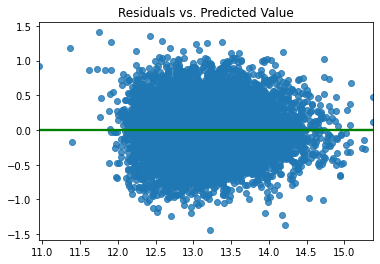

In [49]:
fitted_vals2 = model2.predict()
resids2 = model2.resid

sns.regplot(x=fitted_vals2, y=resids2,line_kws={'color':'green'})
plt.title('Residuals vs. Predicted Value')

<AxesSubplot:ylabel='Density'>

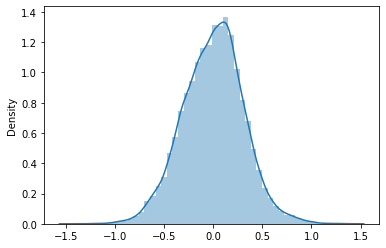

In [50]:
sns.distplot(model2.resid)

((array([-3.99701367, -3.78178933, -3.66405957, ...,  3.66405957,
          3.78178933,  3.99701367]),
  array([-1.43943594, -1.36918036, -1.24364026, ...,  1.28241529,
          1.35437968,  1.40752372])),
 (0.30850519780335534, 1.5351390381936288e-12, 0.9990719779943724))

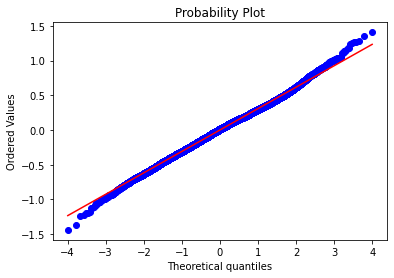

In [51]:
stats.probplot(resids2,plot=sns.mpl.pyplot)

<AxesSubplot:>

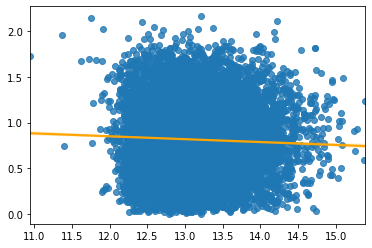

In [52]:
resids_standardized2 = model2.get_influence().resid_studentized_internal
sns.regplot(x=fitted_vals2, y=np.sqrt(np.abs(resids_standardized2)),line_kws={'color':'orange'})

In [53]:
vif2 = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
pd.DataFrame({'vif': vif2[1:]}, index=x1.columns[1:])

,vif
bedrooms,1.481431
bathrooms,2.967646
sqft_lot,6.974221
floors,2.234930
waterfront,1.206068
view,1.385073
condition,1.249466
grade,2.619818
sqft_basement,1.451597
yr_built,2.215316


In [54]:
x1=x1.drop(['const'],1)
x1.shape

(21611, 16)

In [55]:
y.shape

(21611,)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=6)

# Linear regression

In [57]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()

In [58]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [59]:
lr_model.score(x_train,y_train)

0.6543424562303494

In [60]:
lr_model.score(x_test,y_test)

0.6603497122686994

In [61]:
pred=lr_model.predict(x_test)
pred

array([13.11527578, 13.64014156, 13.00909677, ..., 13.17044388,
       13.20375932, 13.0095666 ])

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int),pred.astype(int)))

              precision    recall  f1-score   support

          11       1.00      0.03      0.05        78
          12       0.74      0.79      0.76      3039
          13       0.74      0.74      0.74      3066
          14       0.66      0.45      0.53       289
          15       0.67      0.17      0.27        12

    accuracy                           0.74      6484
   macro avg       0.76      0.43      0.47      6484
weighted avg       0.74      0.74      0.73      6484



From the above report you can see that the f1-score is 0.74, which shows the accuracy of the model is good but can be better.

In [63]:
A=pd.DataFrame({'Actual':y_test,'Predicted':pred})
A

,Actual,Predicted
14500,13.044121,13.115276
21394,13.569610,13.640142
1594,13.122363,13.009097
16846,12.468437,12.604605
17694,12.525435,12.691942
...,...,...
16818,13.317107,12.916244
11255,11.918391,12.742202
19913,12.899220,13.170444
2059,12.969212,13.203759


# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [65]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [66]:
dt_model.score(x_train,y_train)

0.9999977574450696

In [67]:
dt_model.score(x_test,y_test)

0.650217978836569

In [68]:
pred=dt_model.predict(x_test)
pred

array([13.00582956, 13.57725337, 13.42984808, ..., 12.9310818 ,
       12.70381303, 13.24458101])

In [69]:
y_test

14500    13.044121
21394    13.569610
1594     13.122363
16846    12.468437
17694    12.525435
           ...    
16818    13.317107
11255    11.918391
19913    12.899220
2059     12.969212
15295    13.370004
Name: price, Length: 6484, dtype: float64

In [70]:
print(classification_report(y_test.astype(int),pred.astype(int)))

              precision    recall  f1-score   support

          11       0.16      0.21      0.18        78
          12       0.80      0.80      0.80      3039
          13       0.79      0.78      0.78      3066
          14       0.56      0.60      0.58       289
          15       0.25      0.08      0.12        12

    accuracy                           0.77      6484
   macro avg       0.51      0.49      0.49      6484
weighted avg       0.77      0.77      0.77      6484



From the above report you can see that the f1-score is 0.77, which shows the accuracy of the model is good but can be better.

In [71]:
B=pd.DataFrame({'Actual':y_test,'Predicted':pred})
B

,Actual,Predicted
14500,13.044121,13.005830
21394,13.569610,13.577253
1594,13.122363,13.429848
16846,12.468437,12.198040
17694,12.525435,12.474190
...,...,...
16818,13.317107,13.180632
11255,11.918391,12.206073
19913,12.899220,12.931082
2059,12.969212,12.703813


# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf_model=RandomForestRegressor(max_depth=30,n_estimators=400,bootstrap=True,max_samples=0.5)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_samples=0.5, n_estimators=400)

In [74]:
rf_model.score(x_train,y_train)

0.9315906540713241

In [75]:
rf_model.score(x_test,y_test)

0.8178309808729749

In [76]:
pred=rf_model.predict(x_test)
pred

array([13.11527657, 13.6081571 , 13.29873614, ..., 13.12579316,
       13.14955932, 12.96742658])

In [77]:
print(classification_report(y_test.astype(int),pred.astype(int)))

              precision    recall  f1-score   support

          11       0.64      0.09      0.16        78
          12       0.85      0.87      0.86      3039
          13       0.83      0.86      0.85      3066
          14       0.74      0.56      0.64       289
          15       0.00      0.00      0.00        12

    accuracy                           0.84      6484
   macro avg       0.61      0.48      0.50      6484
weighted avg       0.84      0.84      0.83      6484



From the above report you can see that the f1-score is 0.84, which shows the accuracy of the model to be good.

In [78]:
C=pd.DataFrame({'Actual':y_test,'Predicted':pred})
C

,Actual,Predicted
14500,13.044121,13.115277
21394,13.569610,13.608157
1594,13.122363,13.298736
16846,12.468437,12.297062
17694,12.525435,12.499034
...,...,...
16818,13.317107,13.221175
11255,11.918391,12.495191
19913,12.899220,13.125793
2059,12.969212,13.149559


Now i will cross check the price given by all the algorithms with the actual price in our 1st column of our actual dataset(i.e 221900.0 ).

In [79]:
test_data=x1.loc[0:15,:]
test_data

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Month,Year
0,3,1.00,2.156334,1.0,0,0,3,7,0.000000,1955,0,98178,7.200425,2.156334,10,2014
1,3,2.25,2.184663,2.0,0,0,3,7,1.567309,1951,1991,98125,7.432484,2.190650,12,2014
2,2,1.00,2.220327,1.0,0,0,3,6,0.000000,1933,0,98028,7.908387,2.196660,2,2015
3,4,3.00,2.142087,1.0,0,0,5,7,1.666971,1965,0,98136,7.215240,2.142087,12,2014
4,3,2.00,2.196908,1.0,0,0,3,8,0.000000,1987,0,98074,7.495542,2.188639,2,2015
5,4,4.50,2.445129,1.0,0,0,3,11,1.733213,2001,0,98053,8.468003,2.445129,5,2014
6,3,2.25,2.177868,2.0,0,0,3,7,0.000000,1995,0,98003,7.713338,2.177868,6,2014
7,3,1.50,2.217138,1.0,0,0,3,7,0.000000,1963,0,98198,7.408531,2.217138,1,2015
8,3,1.00,2.188145,1.0,0,0,3,7,1.639643,1960,0,98146,7.484369,2.197360,4,2015
9,3,2.50,2.173472,2.0,0,0,3,7,0.000000,2003,0,98038,7.779049,2.189635,3,2015


In [80]:
pred1=lr_model.predict(test_data)
pred1=np.exp(pred1)
pred1=pred1.round(2)
pred1

array([ 303979.77,  491655.08,  364006.99,  434935.04,  404356.47,
       1391626.94,  363520.81,  337740.9 ,  371613.52,  380819.28,
        575025.28,  370491.82,  416805.42,  296216.66,  497411.85,
        912249.26])

In [81]:
pred2=dt_model.predict(test_data)
pred2=np.exp(pred2)
pred2=pred2.round(2)
pred2

array([ 221900.,  489000.,  145000.,  439000.,  479000., 1225000.,
        257500.,  283500.,  229500.,  323000.,  713500.,  515000.,
        310000.,  400000.,  530000.,  650000.])

In [82]:
pred3=rf_model.predict(test_data)
pred3=np.exp(pred3)
pred3=pred3.round(2)
pred3

array([ 223799.22,  432640.76,  366162.35,  425172.54,  457948.11,
       1367193.27,  270394.95,  237444.47,  292930.81,  336655.28,
        595438.19,  459080.22,  341627.89,  367817.99,  547440.87,
        749673.9 ])

In [83]:
D=pd.DataFrame({'Actual':data.price.loc[0:15],'Linear Regression':pred1,'Decision Tree':pred2,'Random Forest':pred3})
D

,Actual,Linear Regression,Decision Tree,Random Forest
0,221900.0,303979.77,221900.0,223799.22
1,538000.0,491655.08,489000.0,432640.76
2,180000.0,364006.99,145000.0,366162.35
3,604000.0,434935.04,439000.0,425172.54
4,510000.0,404356.47,479000.0,457948.11
5,1225000.0,1391626.94,1225000.0,1367193.27
6,257500.0,363520.81,257500.0,270394.95
7,291850.0,337740.90,283500.0,237444.47
8,229500.0,371613.52,229500.0,292930.81
9,323000.0,380819.28,323000.0,336655.28


From the above table, you can see that both Decision Tree and Random Forest models have predicted the prices close to the actual price. Random Forest model having accuracy 84% is preferable than Decision Tree model having accuracy 77%.

Therefore, I can use the model built by using Random Forest Regressor Algorithms to predict price of new unseen data.